In [14]:
import pickle
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import autokeras as ak
import scipy

In [10]:
# open pickle file
with open('/mnt/160G/askari/figs_class.pickle', 'rb') as handle:
  x_train, y_train, x_test, y_test = pickle.load(handle)

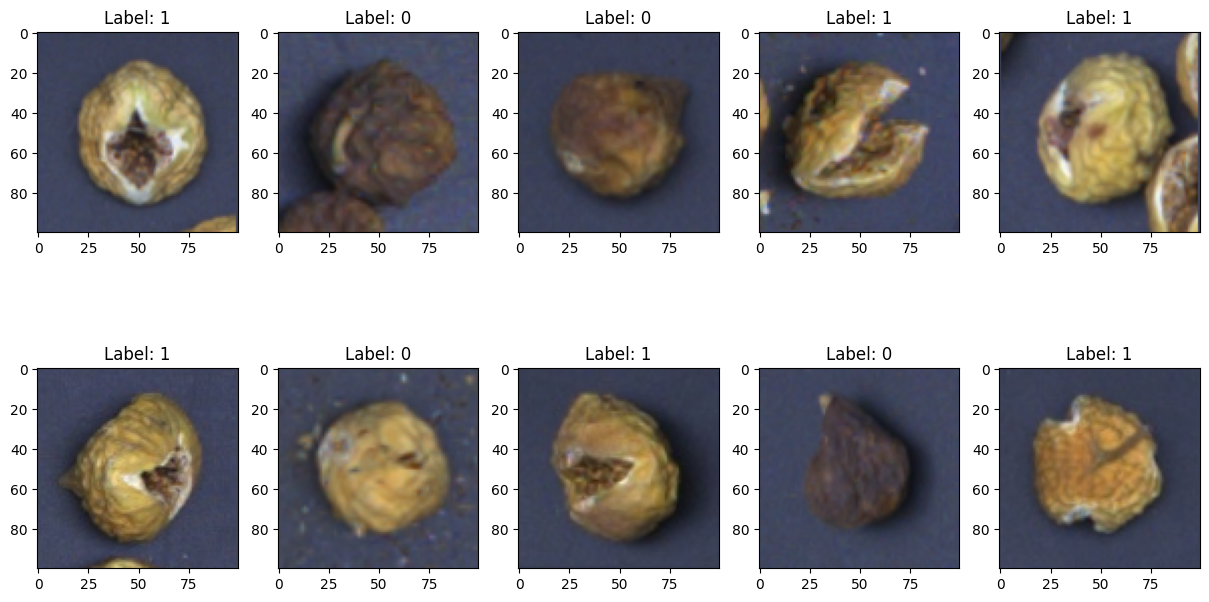

In [9]:
num_images = 10

random_indices=random.sample(range(len(x_train)),num_images)

images=[x_train[i] for i in random_indices]
labels = [y_train[i] for i in random_indices]

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
axes = axes.flatten()
for i in range(num_images):
    axes[i].imshow(images[i][:,:,::-1])
    axes[i].set_title(f'Label: {labels[i]}')
plt.show()

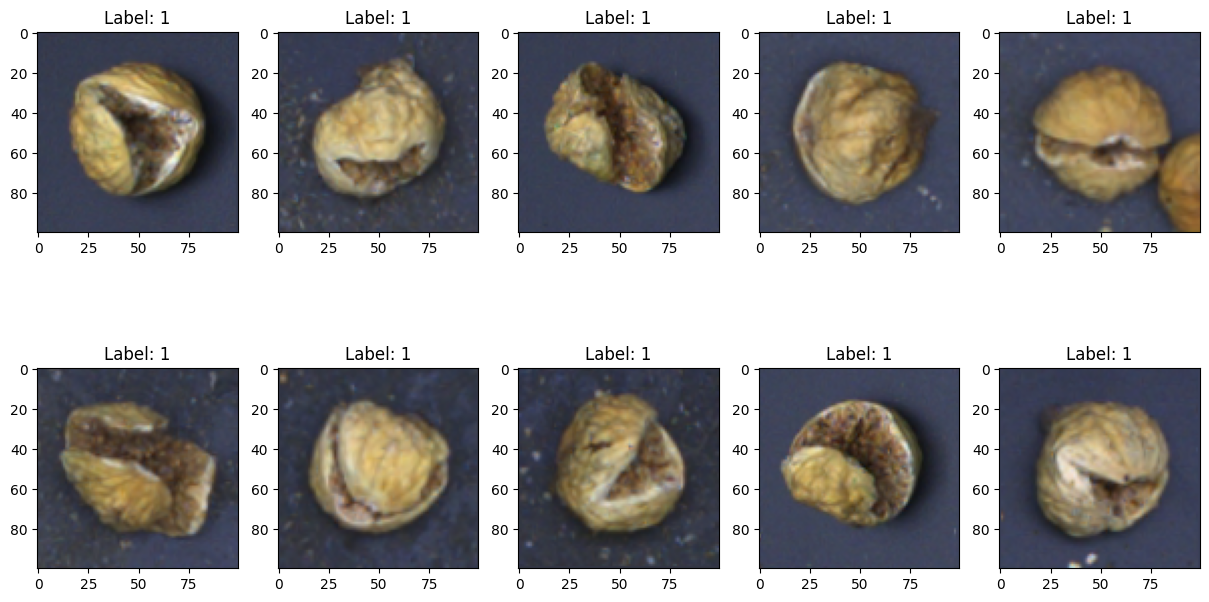

In [18]:
num_images = 10

images = []
labels = []
for i in range(len(y_train)):
    if y_train[i] == 1:
        images.append(x_train[i])
        labels.append(y_train[i])
        if len(images) == num_images:
            break

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
axes = axes.flatten()
for i in range(num_images):
    axes[i].imshow(images[i][:,:,::-1])
    axes[i].set_title(f'Label: {labels[i]}')
plt.show()

In [19]:
import autokeras as ak

In [30]:
from keras.preprocessing.image import ImageDataGenerator

# Define the image data generator with augmentation techniques
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

In [54]:
# Generate augmented data
augmented_train_data = train_datagen.flow(x_train, y_train)

In [56]:
# from scipy import some_function, some_submodule
# Concatenate the augmented data with the original data
x_train_augmented = x_train.copy()
y_train_augmented = y_train.copy()

# for data in range(len(augmented_train_data)):
#     print(augmented_train_data[data][0])
#     x_train_augmented = np.concatenate((x_train_augmented, augmented_train_data[data][0]), axis=0)
#     y_train_augmented = np.concatenate((y_train_augmented, augmented_train_data[data][1]), axis=0)

In [57]:
from keras.callbacks import EarlyStopping
# Define the EarlyStopping callback.
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=1)

In [58]:
from keras.callbacks import ModelCheckpoint
# Define the ModelCheckpoint callback.
checkpoint = ModelCheckpoint('best_model.h5',
                             monitor='val_accuracy',
                             save_best_only=True, mode='max',
                             verbose=1)

In [60]:
from sklearn.model_selection import train_test_split

# Split the training data into training and validation data
x_train_aug, x_val, y_train_aug, y_val = train_test_split(x_train_augmented, y_train_augmented, test_size=0.15)

In [62]:
image_size=[32,64,80,100]

input_node = ak.ImageInput()
output_node = ak.Normalization()(input_node)
output_node = ak.ImageAugmentation(horizontal_flip=True)(output_node)
output_node = ak.ResNetBlock(version="v2")(output_node)
output_node = ak.ClassificationHead()(output_node)
clf = ak.AutoModel(
    inputs=input_node
    , outputs=output_node
    , overwrite=True
    , max_trials=100
    ,objective="val_accuracy"
)


In [ ]:
history=clf.fit(x_train_aug,
    y_train_aug,
    # Split the training data and use the last 15% as validation data.
    validation_data=(x_val, y_val),
    callbacks=[early_stop])


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
0                 |0                 |image_augmentation_1/translation_factor
True              |True              |image_augmentation_1/vertical_flip
0                 |0                 |image_augmentation_1/rotation_factor
0                 |0                 |image_augmentation_1/zoom_factor
0.1               |0.1               |image_augmentation_1/contrast_factor
False             |False             |res_net_block_1/pretrained
resnet50_v2       |resnet50_v2       |res_net_block_1/version
False             |False             |res_net_block_1/imagenet_size
flatten           |flatten           |classification_head_1/spatial_reduction_1/reduction_type
0                 |0                 |classification_head_1/dropout
adam              |adam              |optimizer
0.001             |0.001             |learning_rate

Epoch 1/1000
53/77 [===================>..........] - ETA: 1:56 - loss: 0.6251 - accuracy

In [ ]:
model2 = clf.export_model()
model2.save('resnetf.h5')

In [15]:
import tensorflow as tf

# Load the model from the H5 file
model3 = tf.keras.models.load_model('/mnt/160G/askari/resnetf.h5')

In [16]:
from sklearn.metrics import accuracy_score

print(x_test.shape)
predictions = model3.predict(x_test)
predicted_labels = []
for i in predictions :
  if i>=0.5:
    predicted_labels.append(1)
  else:
    predicted_labels.append(0)
accuracy = accuracy_score(y_test, predicted_labels)
print('Test accuracy:', accuracy)

(749, 100, 100, 3)
24/24 [==============================] - 30s 1s/step
Test accuracy: 0.9092122830440588


In [17]:
from sklearn.metrics import accuracy_score

print(x_test.shape)
predictions = model3.predict(x_train)
predicted_labels = []
for i in predictions :
  if i>=0.5:
    predicted_labels.append(1)
  else:
    predicted_labels.append(0)
accuracy = accuracy_score(y_train, predicted_labels)
print('Test accuracy:', accuracy)

(749, 100, 100, 3)
91/91 [==============================] - 114s 1s/step
Test accuracy: 0.9467680608365019
